<a href="https://colab.research.google.com/github/YounSooKimTech/CDDS_2023/blob/main/MTA_Comaplints_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd

df = pd.read_csv("/content/MTA_Customer_Feedback_Data__Beginning_2014.csv")

df_subway = df[df["Agency"] == "Subways"]
df_subway = df_subway.fillna("")


In [48]:
df_subway.columns

Index(['Agency', 'Commendation or Complaint', 'Subject Matter',
       'Subject Detail', 'Issue Detail', 'Year', 'Quarter',
       'Branch/Line/Route'],
      dtype='object')

In [49]:
# df_subway.groupby("Year")["Commendation or Complaint"].value_counts()

pivot_table = df_subway.pivot_table(index='Year', columns='Commendation or Complaint', aggfunc='size', fill_value=0)

# Rename the columns for clarity
pivot_table.rename(columns={'Commendation': 'Commendation Count', 'Complaint': 'Complaint Count'}, inplace=True)

# Reset the index to make "Year" a regular column
pivot_table.reset_index(inplace=True)

# Print the resulting DataFrame
print(pivot_table)

Commendation or Complaint    Year  Commendation Count  Complaint Count
0                          2014.0                 437            10193
1                          2015.0                 504            13541
2                          2016.0                 958            35661
3                          2017.0                1198            42195
4                          2018.0                1391            47925
5                          2019.0                2508            64289


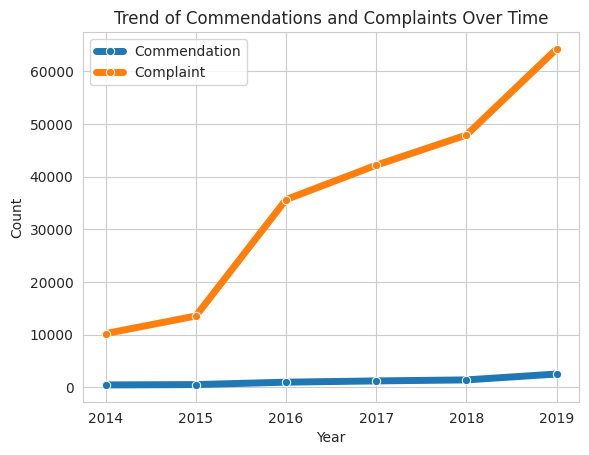

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use sns.lineplot to create the line plot
sns.lineplot(data=pivot_table, x="Year", y="Commendation Count", label="Commendation", marker="o", linewidth=5)
sns.lineplot(data=pivot_table, x="Year", y="Complaint Count", label="Complaint", marker="o", linewidth=5)

plt.title("Trend of Commendations and Complaints Over Time")
plt.xlabel("Year")
plt.ylabel("Count")

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [62]:
df_subway.head()

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route,Combined Text
0,Subways,Complaint,Train,,Appearance / Cleanliness,2019.0,4.0,E,Appearance / Cleanliness
1,Subways,Complaint,Trains,Rail / Subway Cars,Crowding,2019.0,4.0,R,Rail / Subway Cars Crowding
2,Subways,Complaint,Station /Bus Stop /Facility /Structure,Clock,Add More / Not Enough,2019.0,4.0,A,Clock Add More / Not Enough
3,Subways,Complaint,Employees,Police Officer / Law Enforcement,Rude / Inappropriate Language,2019.0,4.0,4,Police Officer / Law Enforcement Rude / Inappr...
4,Subways,Commendation,Employees,Maintenance Staff,Very Helpful / Friendly,2019.0,2.0,No Value,Maintenance Staff Very Helpful / Friendly


In [64]:
df_temp = df_subway[df_subway["Commendation or Complaint"] == "Complaint"]

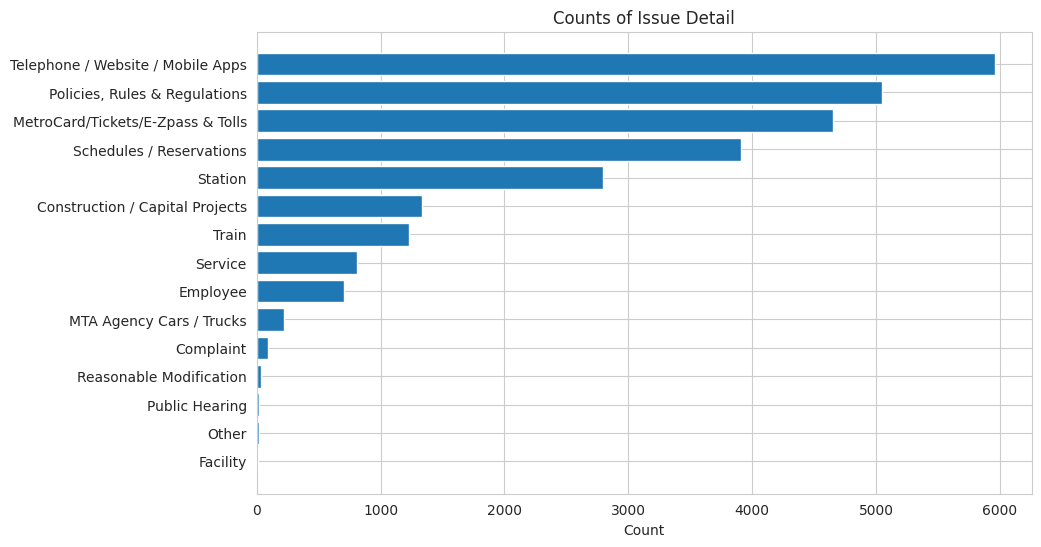

In [75]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_subway

# Calculate the counts of "Issue Detail"
df_subway_complaints = df_temp["Subject Matter"].value_counts().sort_values(ascending=True).head(15)

# Create a horizontal bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.barh(df_subway_complaints.index, df_subway_complaints.values)

# Set plot title and labels
plt.title("Counts of Issue Detail")
plt.xlabel("Count")

# Show the plot
plt.show()


In [52]:
df_subway["Combined Text"] = df_subway.apply(lambda row: str(row["Subject Detail"]) + " " + str(row["Issue Detail"]), axis=1)
